1. **Зроби групування даних по дням** та для згрупованих даних побудуй два графіки:  
   - Графік з **щоденною сумою витрат** на рекламу в **2021 році**;  
   - Графік з **щоденним ROMI** в **2021 році**.  
   **Бонусне міні-завдання:** застосуй метод `rolling()` щоб відобразити **рухоме середнє витрат** та **ROMI**.  

   **Підказка:**  
   Ти можеш порівнювати та фільтрувати дати навіть без конвертації значень полів.  
   Наприклад: `df['ad_date'] < '2022-01-01'`


2. **Зроби групування даних за назвою кампанії** та побудуй два графіки:  
   - Графік **загальної суми витрат** на рекламу в кожній з кампаній;  
   - **Загальний ROMI** в кожній з кампаній.


3. **За допомогою box plot** визнач, яким був **розкид щоденного ROMI** в кожній кампанії (за назвою кампанії).


4. **Побудуй гістограму** з розподілом значень **ROMI** у таблиці `facebook_ads_data.csv`.


5. **Побудуй теплову карту кореляції** між усіма числовими показниками у таблиці `facebook_ads_data.csv`.  
   - Які показники мають **найвищу** та **найнижчу** кореляцію?  
   - З чим корелює **`total_value`**?


6. **Побудуй точкову діаграму** з **лінійною регресією** (використай `lmplot()`), побудовану на даних з `total_spend` та `total_value`, щоб візуалізувати звʼязок між цими величинами.


In [5]:
import pandas as pd

In [6]:
df_fb = pd.read_csv('facebook_ads_data (2.0).csv')
df_fb

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817
...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696


In [4]:
df_fb.describe()

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
mean,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911


In [5]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


In [9]:
df_fb['ad_date'] = pd.to_datetime(df_fb['ad_date'], format = 'mixed')
df_fb['ad_date'].sample(3)

1349   2021-04-16
294    2021-12-25
704    2021-09-03
Name: ad_date, dtype: datetime64[ns]

In [7]:
import matplotlib.pyplot as plt

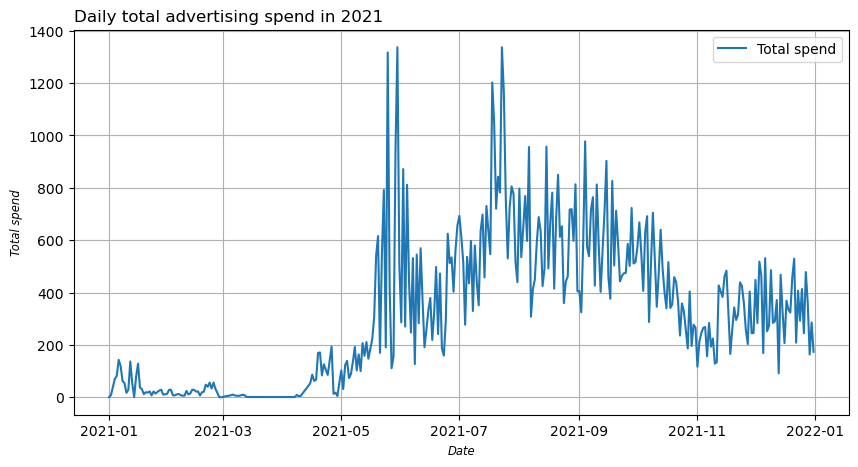

In [16]:
# Графік з щоденною сумою витрат на рекламу в 2021 році
df_2021 = df_fb[df_fb['ad_date'].dt.year == 2021]
daily_spend = df_2021.groupby('ad_date', as_index=False)['total_spend'].sum()
plt.figure(figsize=(10, 5))
plt.plot(daily_spend['ad_date'], daily_spend['total_spend'])
plt.title('Daily total advertising spend in 2021', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('Total spend', fontsize='small', fontstyle='italic')
plt.legend(['Total spend'], loc='upper right')
plt.grid(True)
plt.show()

In [16]:
# Графік з щоденним ROMI в 2021 році.
df_fb['ROMI'] = (df_fb['total_value'] - df_fb['total_spend']) / df_fb['total_spend'] * 100
df_fb

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi,ROMI
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570,-15.642998
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954,40.695424
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817,-4.718289
...,...,...,...,...,...,...,...,...,...,...,...
1489,2020-11-15,Discounts,6.98,12465,657,10.96,0.01,0.56,0.052708,1.570201,57.020057
1490,2020-11-14,Discounts,7.27,5005,392,12.67,0.02,1.45,0.078322,1.742779,74.277854
1491,2020-11-13,Discounts,6.36,11669,451,9.77,0.01,0.55,0.038649,1.536164,53.616352
1492,2020-11-12,Discounts,23.00,10473,397,21.13,0.06,2.20,0.037907,0.918696,-8.130435


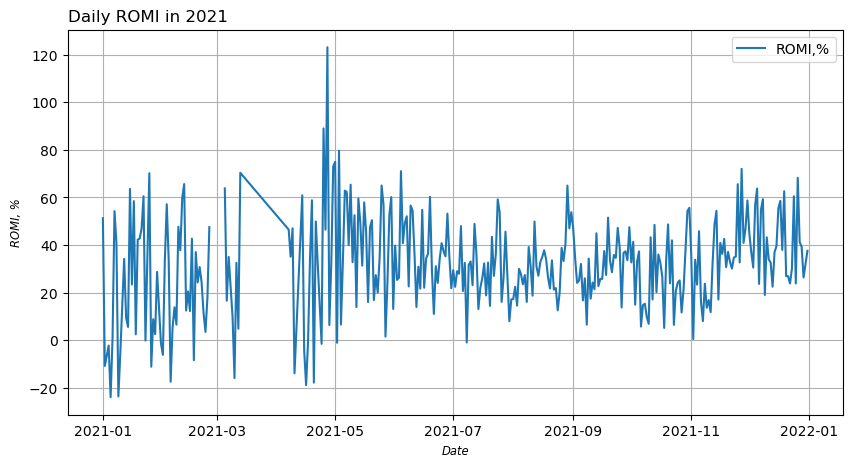

In [11]:
df_2021 = df_fb[df_fb['ad_date'].dt.year == 2021].copy()
df_2021['ROMI'] = (df_2021['total_value'] - df_2021['total_spend']) / df_2021['total_spend'] * 100
daily_romi = df_2021.groupby('ad_date', as_index=False)['ROMI'].mean()
plt.figure(figsize=(10, 5))
plt.plot(daily_romi['ad_date'], daily_romi['ROMI'])
plt.title('Daily ROMI in 2021', fontsize='large', loc='left')
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('ROMI, %', fontsize='small', fontstyle='italic')
plt.legend(['ROMI,%'], loc='upper right')
plt.grid(True)
plt.show()

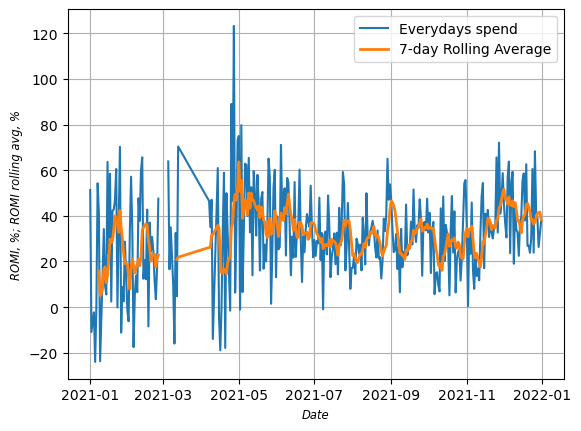

In [12]:
# Бонусне міні-завдання: застосуй метод rolling() щоб відобразити рухоме середнє витрат та ROMI.
daily_romi['ROMI_rolling_avg'] = daily_romi['ROMI'].rolling(window=7).mean()
plt.plot(daily_romi['ad_date'], daily_romi['ROMI'], label='Everydays spend')
plt.plot(daily_romi['ad_date'], daily_romi['ROMI_rolling_avg'], label='7-day Rolling Average', linewidth=2)
plt.xlabel('Date', fontsize='small', fontstyle='italic')
plt.ylabel('ROMI, %; ROMI rolling avg, %', fontsize='small', fontstyle='italic')
plt.legend()
plt.grid(True)
plt.show()

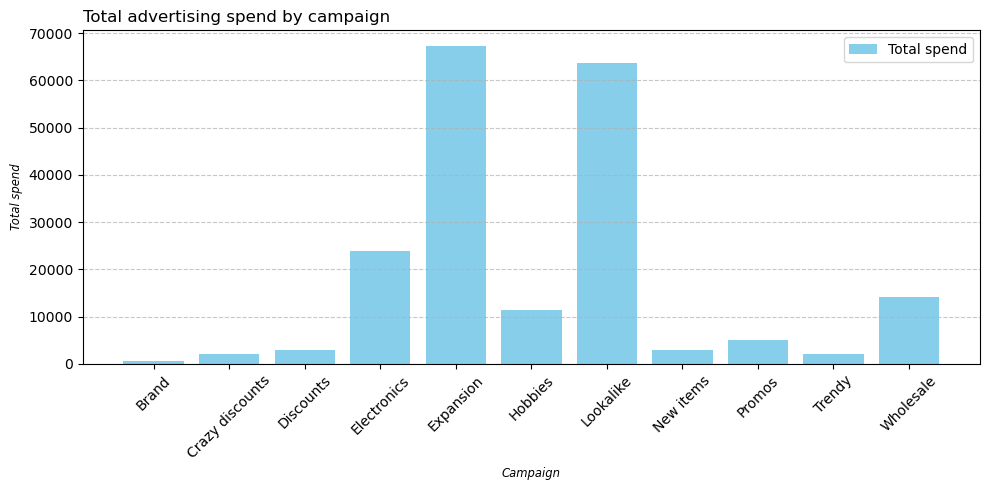

In [13]:
# Графік загальної суми витрат на рекламу в кожній з кампаній
spend_campaign = df_fb.groupby('campaign_name', as_index=False)['total_spend'].sum()
plt.figure(figsize=(10, 5))
plt.bar(spend_campaign['campaign_name'], spend_campaign['total_spend'], color='skyblue')
plt.title('Total advertising spend by campaign', fontsize='large', loc='left')
plt.xlabel('Campaign', fontsize='small', fontstyle='italic')
plt.ylabel('Total spend', fontsize='small', fontstyle='italic')
plt.legend(['Total spend'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

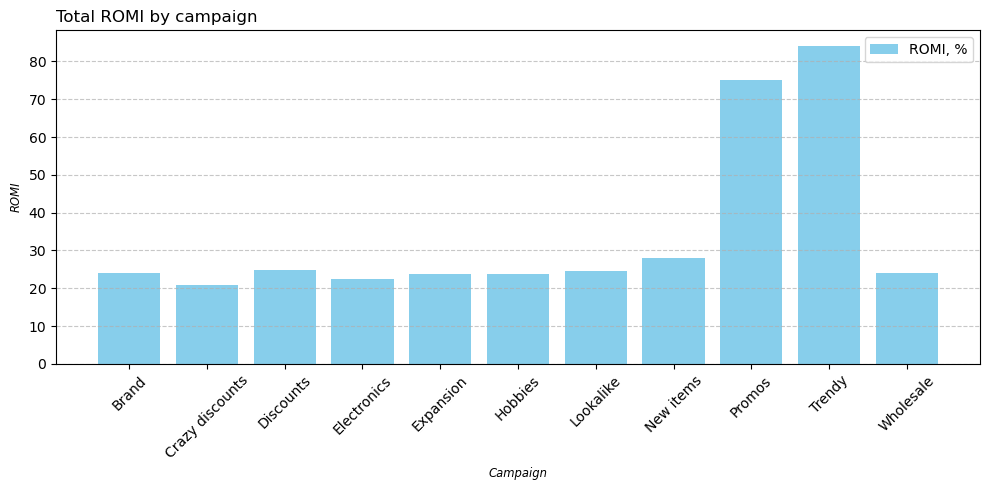

In [18]:
# Загальний ROMI в кожній з кампаній.
romi_campaign = df_fb.groupby('campaign_name', as_index=False)['ROMI'].mean()
plt.figure(figsize=(10, 5))
plt.bar(romi_campaign['campaign_name'], romi_campaign['ROMI'], color='skyblue')
plt.title('Total ROMI by campaign', fontsize='large', loc='left')
plt.xlabel('Campaign', fontsize='small', fontstyle='italic')
plt.ylabel('ROMI', fontsize='small', fontstyle='italic')
plt.legend(['ROMI, %'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import seaborn as sns

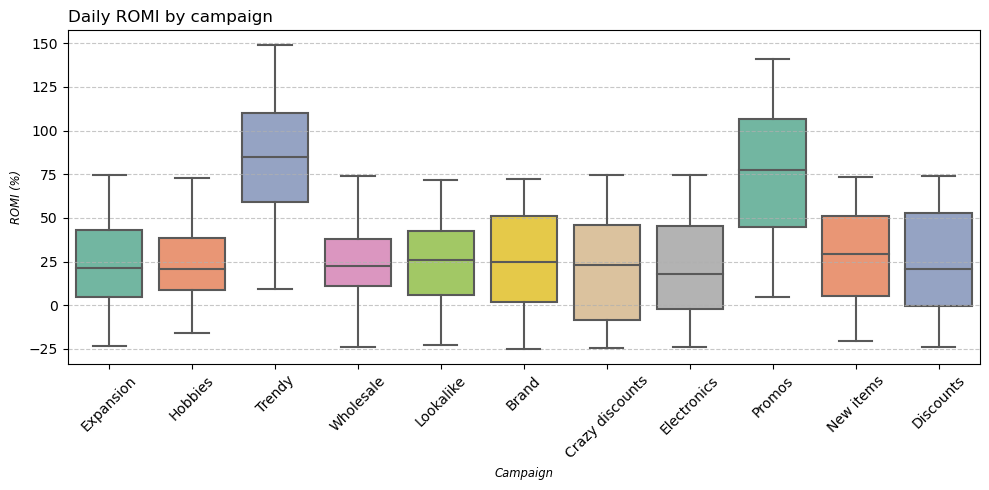

In [20]:
# За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампанії (за назвою кампанії).
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_fb, x='campaign_name', y='ROMI', palette='Set2')
plt.title('Daily ROMI by campaign', fontsize='large', loc='left')
plt.xlabel('Campaign', fontsize='small', fontstyle='italic')
plt.ylabel('ROMI (%)', fontsize='small', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


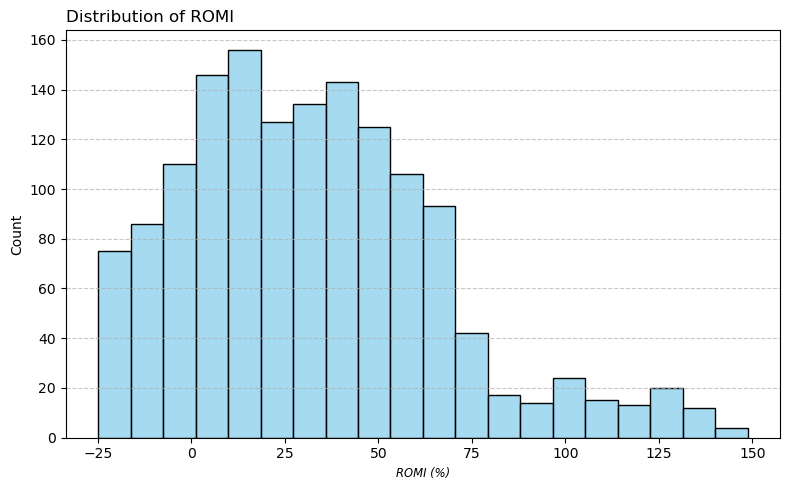

In [21]:
# Побудуй гістограму з розподілом значень ROMI у таблиці facebook_ads_data.csv.
plt.figure(figsize=(8, 5))
sns.histplot(data=df_fb, x='ROMI', bins=20, color='skyblue')
plt.title('Distribution of ROMI', fontsize='large', loc='left')
plt.xlabel('ROMI (%)', fontsize='small', fontstyle='italic')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

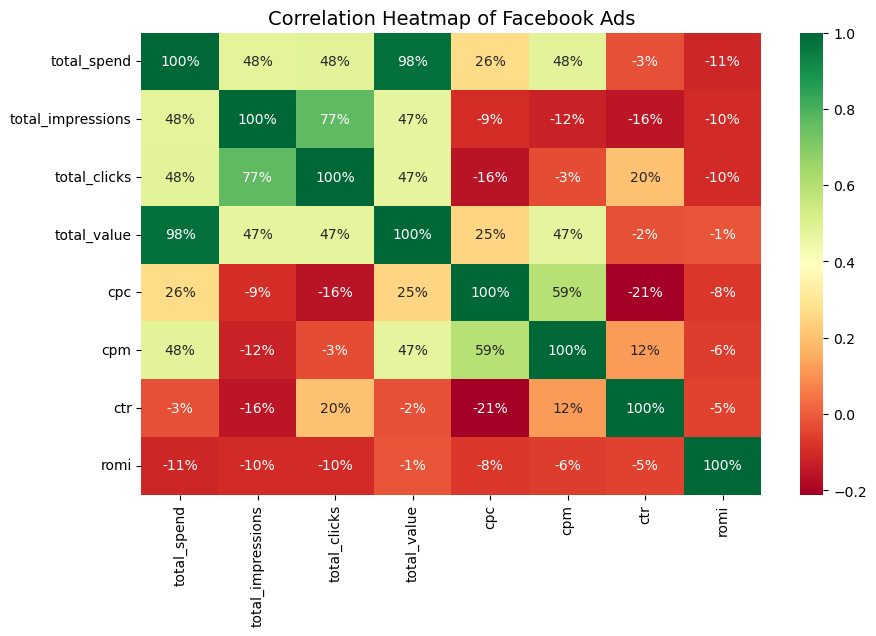

In [19]:
# Теплова карта кореляції між усіма числовими показниками в таблиці 
corr_matrix = df_fb.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".0%", cmap='RdYlGn')
plt.title('Correlation Heatmap of Facebook Ads', fontsize=14)
plt.show()


In [24]:
# Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs.drop_duplicates().sort_values()
min_corr = corr_pairs.idxmin(), corr_pairs.min()
max_corr = corr_pairs.idxmax(), corr_pairs.max()
print("Min correlation:", min_corr)
print("Max correlation:", max_corr)

corr_total_value = corr_matrix['total_value'].drop('total_value')
max_corr_total_value = corr_total_value.idxmax(), corr_total_value.max()
print("Max correlation with total_value:", max_corr_total_value)

Min correlation: (('cpc', 'ctr'), -0.2107190927671994)
Max correlation: (('total_spend', 'total_spend'), 1.0)
Max correlation with total_value: ('total_spend', 0.978889925874156)


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


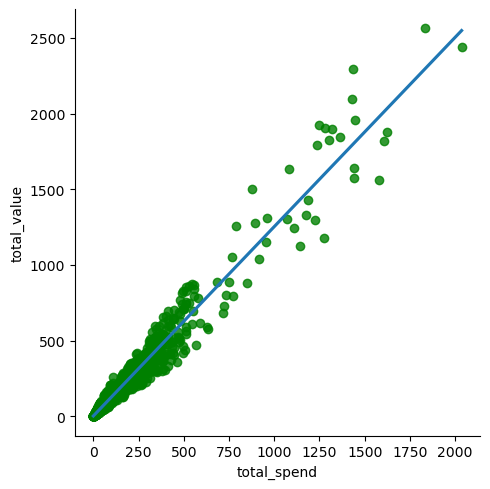

In [34]:
# Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.
sns.lmplot(data = df_fb, x='total_spend', y='total_value', scatter_kws={'color':'g'}, 
           height=5, aspect=1, ci=None)